# Confidence Intervals

- When we try to estimate a population parameter based on a sample statistic it is like fishing with a fishing pole

    - this is good, but I will be more likely if I use a net
    
    - the larger the net the more confident I will be that I capture a fish
    
    - the net is like building a confidence interval for our estimates
    
- Analogy breaks down; because parameter is non moving number and fish move
    
- Captures Essence:

    - providing an interval and not just  a single estimate will help us gain confidence in capturing a population parameter is at the core of confidence intervals
    
    - the wider our interval the more confident we can be we captured our parameter
    
- Recall:

    - we previously saw we can use sampling distributions and bootstrapping to understand values of a statistic that are possible
   
    - we can use sampling distributions to infer values of a parameter as well
    
    - real populations are something like:
    
        - all the people in past, now, and future 
        
        - all the past, present, and future transactions of a company
        
    - we never have all the information
   
   
- Question:

    - how do we use sampling distributions to infer where a parameter is located given that these popultions can't be measured directly
    
- Say we have a sampling distribution for some statistics

    - we can use this sampling distribution to build a confidence interval for our 
    
    - If we want a 95% confidence interval, we cut off the range of 2.5% from each side and say that the estimate can be anywhere in that range with 95% confidence

Dataset: how heights and coffee drinking habits relate to each other

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
np.random.seed(42)

In [126]:
coffee_full = pd.read_csv("data/coffee_dataset.csv")

In [127]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [128]:
# We are pretending this is all the data we have
coffee_red = coffee_full.sample(200)

In [129]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


1. What is the proportion of coffee drinkers in the sample $ p$? What is the proportion of individuals that don't drink coffee $ (1-p)$?

In [130]:
p = coffee_red[coffee_red["drinks_coffee"] == True].shape[0] \
                    / coffee_red.shape[0]

In [131]:
p, (1-p)

(0.595, 0.405)

2. Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [132]:
coffee_red[coffee_red["drinks_coffee"] == True].height.mean()

68.11962990858616

In [133]:
coffee_red[coffee_red["drinks_coffee"] == False].height.mean()

66.78492279927877

3. Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [134]:
bootsample = coffee_red.sample(200, replace=True)
boot_p = bootsample[bootsample["drinks_coffee"] == True].shape[0] / 200

In [135]:
boot_p, (1-boot_p)

(0.605, 0.395)

Notice that our bootstrap sample doesn't get us the exact math to our porportions before, this is because we are sampling with replacement from our 200 sample, so we probably have same members more then once

In [136]:
# As we can see, we have only 123 uniquee values
bootsample.user_id.unique().shape[0]

127

4. Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

In [137]:
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append( bootsample[bootsample["drinks_coffee"] == False]
                       .height.mean()
                     )

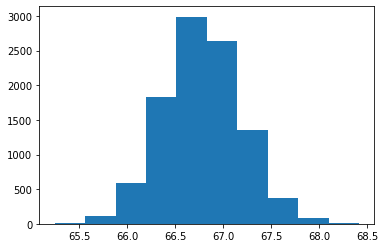

In [138]:
plt.hist(boot_means);

In [139]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281572)

Confidence Interval: We are 95% confident in mean heights of all coffee drinkers too be between 67.06 and 68.57 inches tall

In [140]:
coffee_full[coffee_full["drinks_coffee"] == False]["height"].mean()

66.443407762147

Notice that we were correct in our confidence interval, but note that we aren't always successful

Also notice that our mean for our sample was pretty close to the mean of our population parameter

In [141]:

np.array(boot_means).mean()

66.78061683241549

## Difference In Means

- We have seen how we can use sampling distributions to build confidence intervals for a single parameter, lets now see how we can do the same thing for the difference in two parameters

- Question: What is the difference in the mean heights for coffee vs non coffee drinkers

    - we will do same thing as before but we will take the mean of each group and record the difference
    
    - we can build a confidence interval for the differences in means

In [142]:
np.random.seed(42)

coffee_red = coffee_full.sample(200)

In [143]:
bootsample = coffee_red.sample(200, replace=True)
mean_coff = bootsample[bootsample["drinks_coffee"] == True].height.mean()
mean_nocoff = bootsample[bootsample["drinks_coffee"] == False].height.mean()
mean_coff - mean_nocoff

1.9732964788157403

In [144]:
mean_diff = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = bootsample[bootsample["drinks_coffee"] == True].height.mean()
    mean_nocoff = bootsample[bootsample["drinks_coffee"] == False].height.mean()
    mean_diff.append(mean_coff - mean_nocoff)

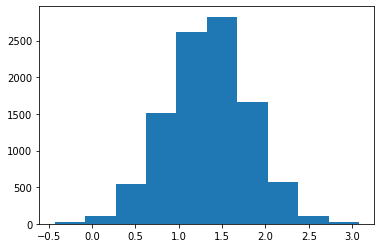

In [146]:
plt.hist(mean_diff);

1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

In [148]:
np.percentile(mean_diff, 0.05), np.percentile(mean_diff, 99.5)

(-0.2520885795331841, 2.5388333707966284)

Conclusion: Since a confidence interval is () we have evidence of the mean height for coffee drinkers is larger then that of non coffee drinkers

2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below.

In [153]:
mean_diff = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_old = bootsample.query("age == '>=21'").height.mean()
    mean_young = bootsample.query("age == '<21'").height.mean()
    mean_diff.append(mean_old - mean_young)

In [154]:
np.percentile(mean_diff, 0.05), np.percentile(mean_diff, 99.5)

(3.0748688194243057, 5.093245067066094)

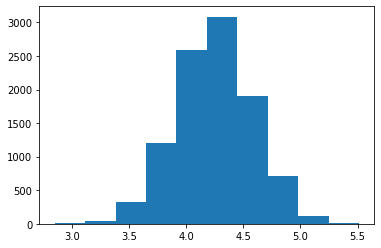

In [157]:
plt.hist(mean_diff);

3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.

## Applications of Confidence Intervals

- We saw we can build confidence intervals in means and differences in means

- when is differences of means useful?

    - we can compare two groups who take different drugs or two different groups where one took the drug and the other didn't
    
    - implement two different ways to teach a topic, and see which way improves retention
    
        - In general we expose two different groups to two differnt things and see which has theb better outcome, when applied to web design we compare two web pages to one another to decide which web design has largest amount of traffic 
    
- This is A/B testing:

    - A/B testing is where you take one group of people and give them one thing, then take another group and give them another thing, and then you ask each group of people to take an action of some sort and see which group of people do that action the most. 

    - In the world of website testing it is showing one version of a page of your website to some of your visitors and another version to others, then measuring which version makes you more money (either measuring direct sales, signups, how many people continue using your site / product etc). 

## Statistical vs Practical Differences

- We have now been introduced to a few different applications to confidence intervals and using bootstrapping to create confidence interval

    - using differences in means of two groups is important to see that it wasn't just randomness
    
- Confidence Intervals issues can arise if they are used exclusively

- Practical Vs statistical significance:

    - we have two ads and we can send them both to the same numbers of users
    
    - we can build a confidence interval that says ad b was better, we now have statistical evidence it is better
    
    - This evidence is statistical significance
    
    - but if the second ad is more expensive, which would we recommend? We might want first ad because it gets interest and it is practical significance
    
  

## Traditional Confidence Intervals

- we have been building ci via bootstrapping and our knowledge of sampling distributions

- this is a very effective method for building ci for any parameter we might be interested in

- In the other courses we have seen in traditional statistics we see formulas a lot

    - these formulas have underlying assumptions and bootstrapping doesn't have these assumptions
    
    - bootstrapping only assumes that the sample is representative of the population
    
    - with large sample sizes, the formulas should provide essentially the same results
    
    - With bootstrapping all we have to do is Simply by understanding what you would like to estimate, and simulating the sampling distribution for the statistic that best estimates that value.
    
    
- Note that they are build into python

    - one sample t test, two sample t test, paired t tesxt, z test, chi squared test, f test
    
        - all are linked to how we construct confidence intervals
        
     - understanding sampling distributions and bootstrapping means that you can simulate the results of any confidence interval you want to build

## Other Languange Associated WIth CI

- Margin of Error

- Confidence Interval Width

- E.g. Candidate A has 34% of votes +- 3% and Candidate B has 22% of the votes +- 3%

      - it says based on 95% confidence interval
      
      - 34% in this example is the sample statistic and the 3% is the margin of error
       
          - (19, 25)  and (31, 37) is confidence interval
          
- If we have too large margin of error, we can use law of large numbers to increase sample size and get better estimates, we can decrease our confidence interval


- Holding all values constant:

    - If we increase our sample size the confidence interval will narrow

    - if we increase our confidence level it will wider our interval

## Correct Interpreations of CI:

- We are aiming our CI at parameters, a single numeric summary of population. 

    - can be mean, var, difference in means
    
- we can't say anything specific about anyone in our population

- Advanced ML techniques can give us information about every individual in a population and answer questions about individuals

    - they attempt to predict an outcome for each specific data point

- confidence intervals aren't good at answering these kinds of problems

    - CI are better with aggregate values in a population (aggregate population vaues, or population parameters)
    
- We would answer a question with:

    - We are 95% confident that the porportion of users that click through using Page A is higher then the average using page b
    
    - not we are 95%confident user recieves page a are more likely to click than if they recieve page b
    
    - Also not: it will work for every individual or for one single.Both are overstatments. More like on average this is what will happen in this population

## CI Vs Hypothesis Testing

The topics of confidence intervals and hypothesis testing essentially do the same thing, but depending on who you talk to or what source you are reading from, it is important to understand both.